In [1]:
import numpy as np #scientific computing 
import pandas as pd #data management 
import seaborn as sns
import itertools

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks

#sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm 
from sklearn.model_selection import train_test_split #Data split function 
from sklearn.preprocessing import LabelEncoder #OneHotEncoding
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from collections import Counter
from imblearn.over_sampling import SMOTE 
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#Decision tree plot
import pydotplus
from IPython.display import Image
from sklearn.metrics import mean_squared_error 
import math

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
#import the data into a Pandas DataFrame
df = pd.read_csv("telco.csv", sep=',', header=0)

EXPLORATORY DATA ANALYSIS 

In [3]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [4]:
#check the data shape
df.shape

(7043, 21)

In [5]:
#overview the dataset
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
#Check the datatypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#Total charges is object although it should be float
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#Now we can see there is 11 missing values in TotalCharges, which need to be removed
df.dropna(inplace = True)
#We need to remove column 'customerID' too, since it is unnecessary
df = df.iloc[:,1:]

In [9]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [10]:
#check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [11]:
#summary statistics for numerical variables
summary_stats = df.describe()
print(summary_stats)

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [12]:
#how many unique values each variable has
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [13]:
#five first rows of the dataframe
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
#Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


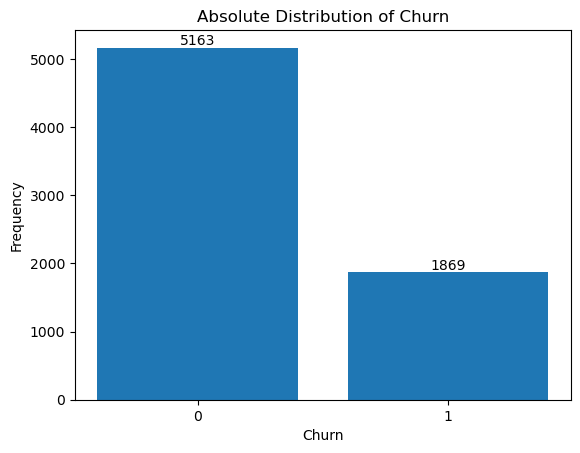

In [15]:
labels = df['Churn'].unique()
bin_edges = [-0.5, 0.5, 1.5]
plt.hist(df['Churn'], bins=bin_edges, rwidth=0.8)
churn_counts = df['Churn'].value_counts()
for i in range(len(labels)):
    plt.text(i, churn_counts[labels[i]], str(churn_counts[labels[i]]), ha='center', va='bottom')
plt.xticks(range(len(labels)), labels)
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.title('Absolute Distribution of Churn')
plt.show()

Text(0.5, 1.0, 'Relative Distribution of Churn')

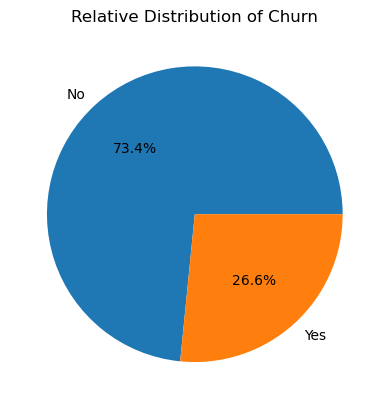

In [16]:
plt.pie(churn_counts, labels=["No", "Yes"], autopct="%1.1f%%");
plt.title('Relative Distribution of Churn')

<Axes: >

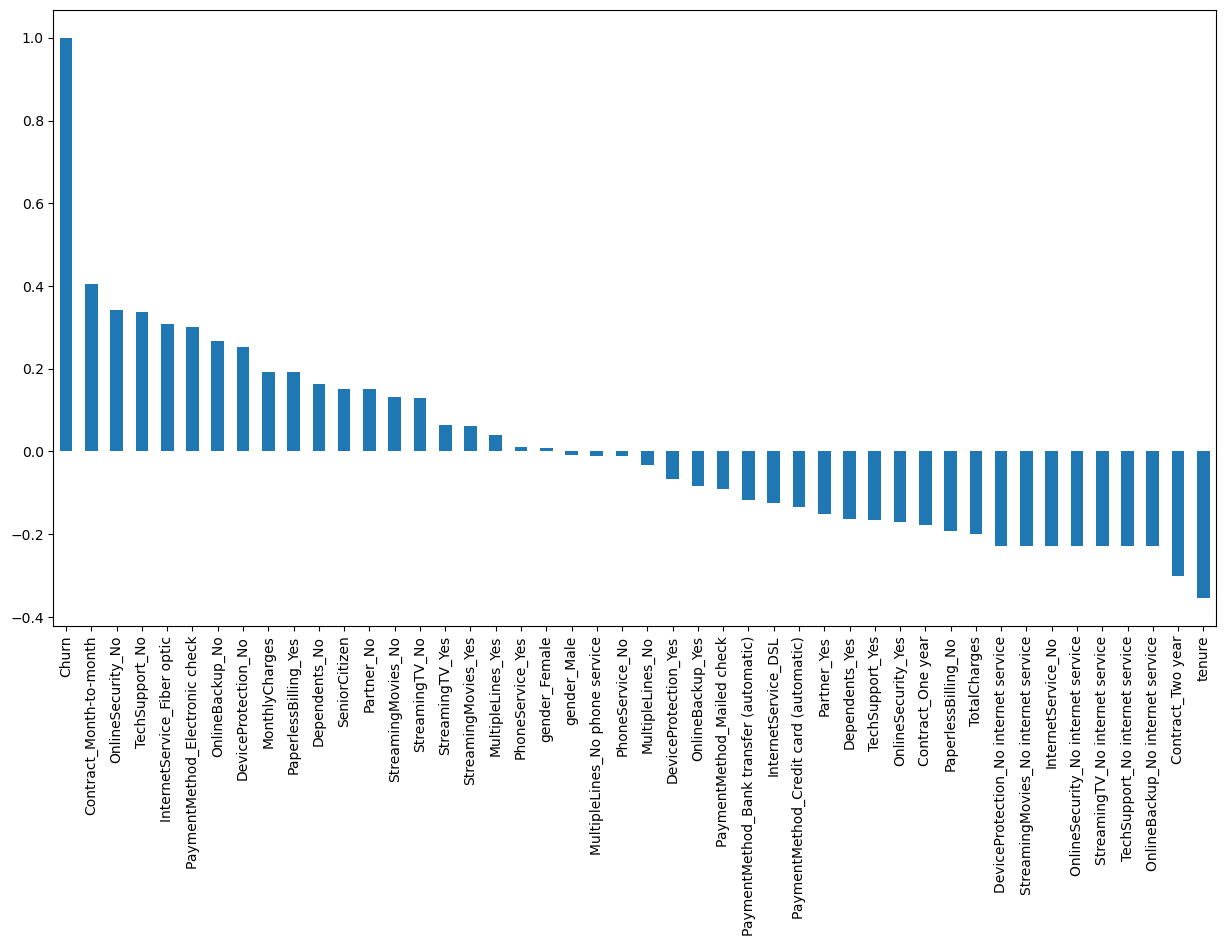

In [17]:
#check the correlation of churn with each variable
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

DATA EXPLORATION

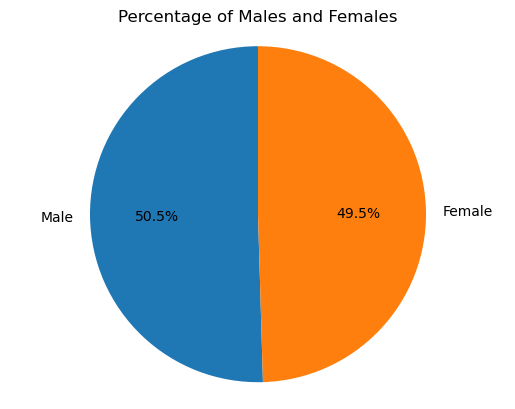

In [18]:
#check distribution of males and females
gender_counts = df['gender'].value_counts(normalize=True) * 100
labels = ['Male', 'Female']
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Males and Females')
plt.show()

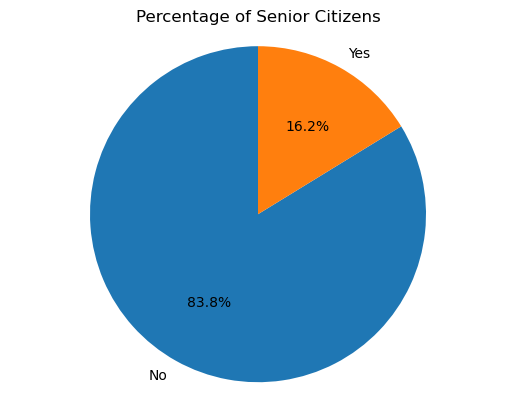

In [19]:
#calculate the percentage of senior citizen
senior_citizen_counts = df['SeniorCitizen'].value_counts(normalize=True) * 100
labels = ['No', 'Yes']
plt.pie(senior_citizen_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Senior Citizens')
plt.show()

/tmp/ipykernel_739/371997048.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['tenure'], hist=True, kde=False,


Text(0.5, 1.0, '# of Customers by their tenure')

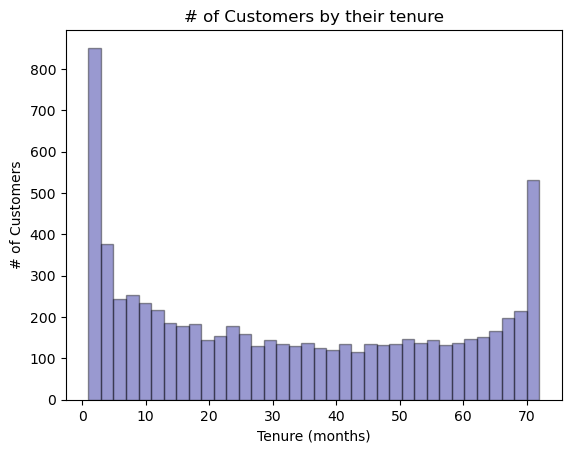

In [20]:
#check the amount of months customers have been subscribing
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

/tmp/ipykernel_739/4047261823.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
/tmp/ipykernel_739/4047261823.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
/tmp/ipykernel_739/4047261823.p

Text(0.5, 1.0, 'Two Year Contract')

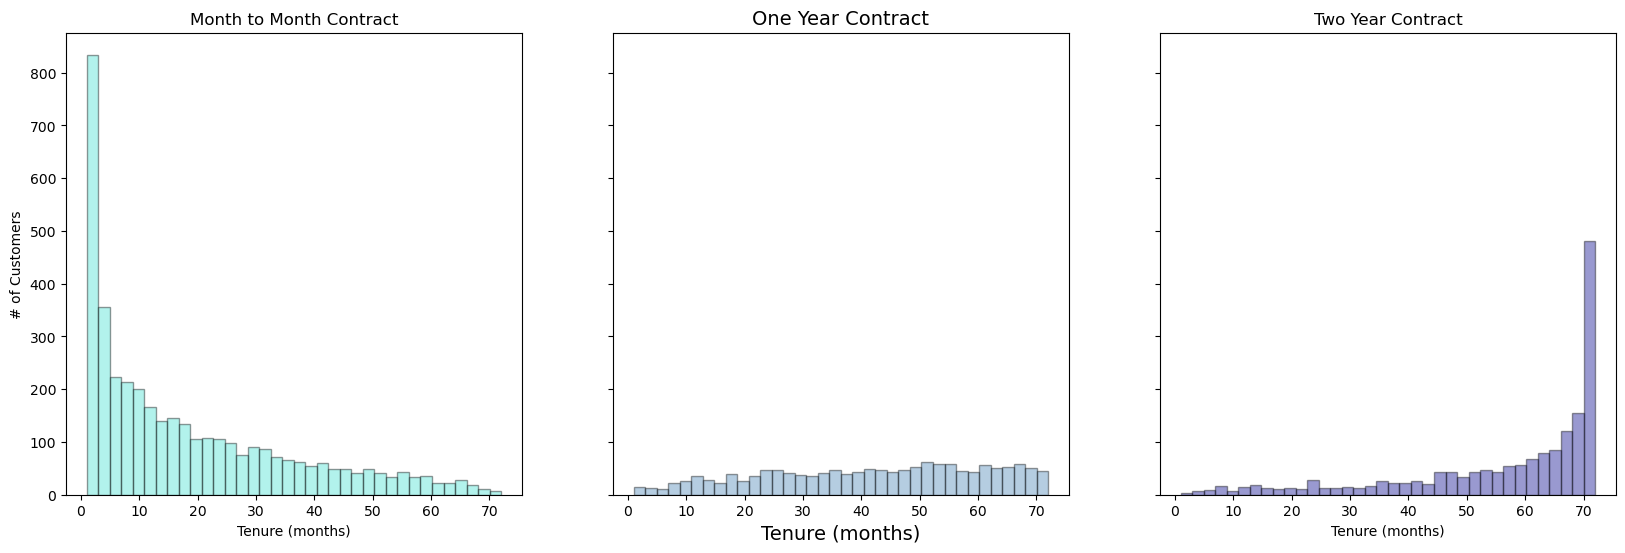

In [21]:
#lets differentiate each contract type
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

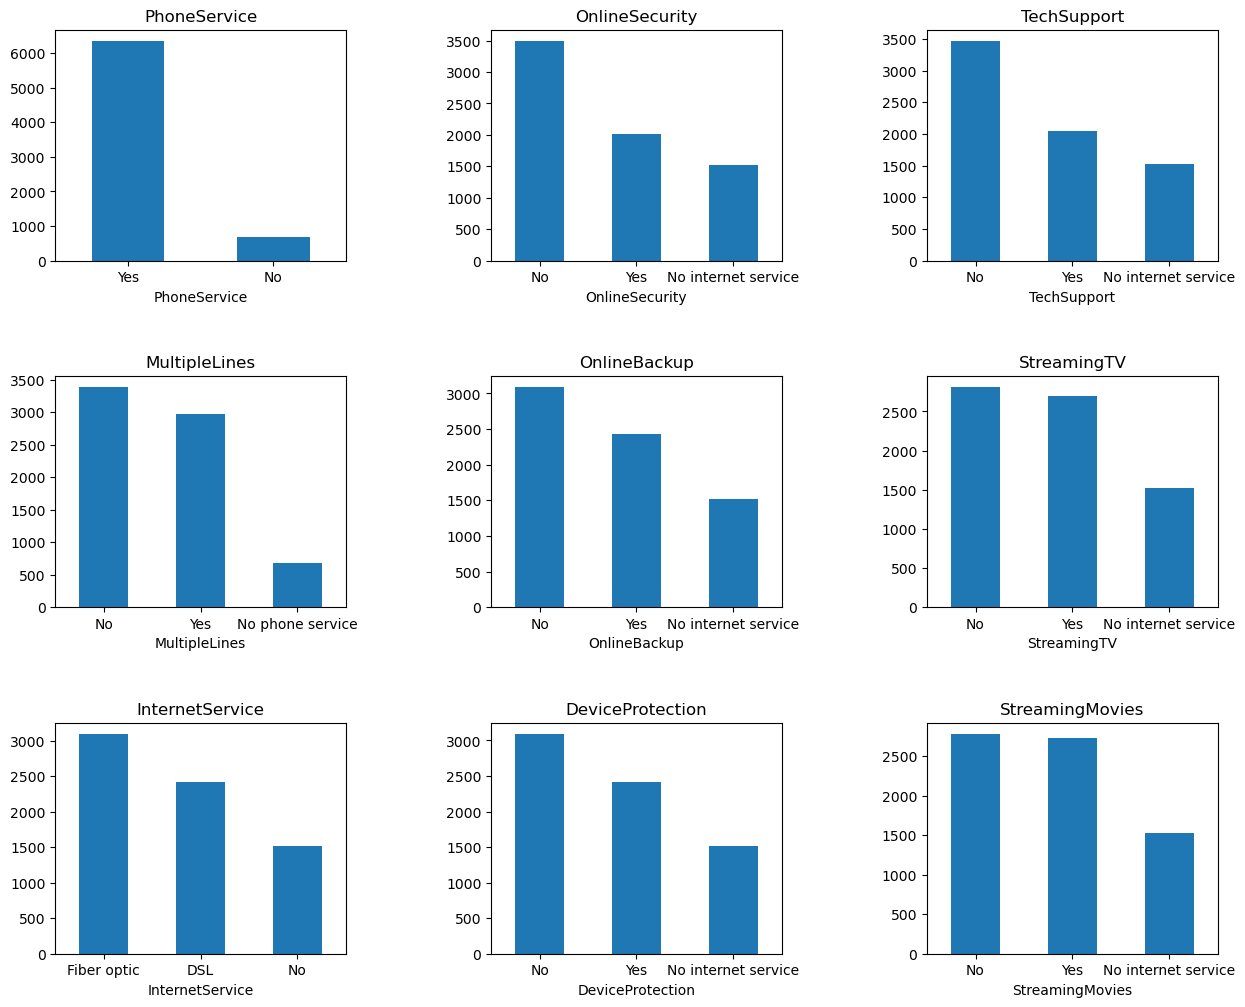

In [22]:
#Lets check what services customers have
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i, 0], rot=0)
    elif 3 <= i < 6:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i - 3, 1], rot=0)
    elif 6 <= i < 9:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i - 6, 2], rot=0)
    ax.set_title(item)

plt.show()

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

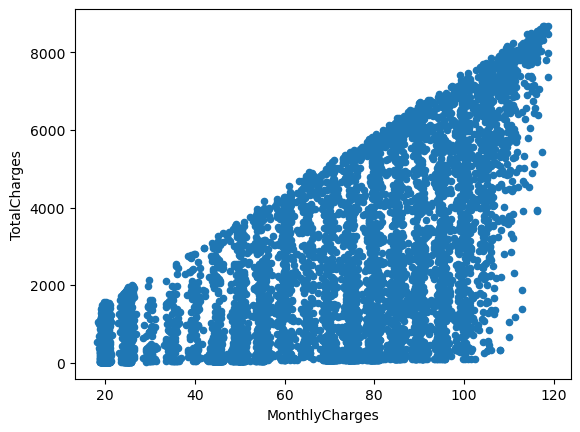

In [23]:
#relation between monthly and total charges
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

In [24]:
#lets add all the services into a one column, where we can see the count of services
df['Extra_Services_Count'] = df[['OnlineSecurity', 'TechSupport', 'OnlineBackup', 'StreamingTV', 'DeviceProtection','StreamingMovies']].apply(lambda row: row.str.count('Yes').sum(), axis=1)
df['Extra_Services_Level'] = pd.cut(
    df['Extra_Services_Count'],
    bins=[-1, 0, 2, float('inf')],
    labels=['No Extra Services', '1 or More', '3 or More'],
    right=True)  # Add a closing parenthesis here
df['No_Extra_Services'] = (df['Extra_Services_Count'] == 0).astype(int)
df['No_Extra_Services'] = (df['Extra_Services_Count'] == 0).astype(int) 
df['1_to_3_Extra_Services'] = ((df['Extra_Services_Count'] >= 1) & (df['Extra_Services_Count'] <= 3)).astype(int) 
df['4_or_More_Extra_Services'] = (df['Extra_Services_Count'] >= 4).astype(int)

<Axes: >

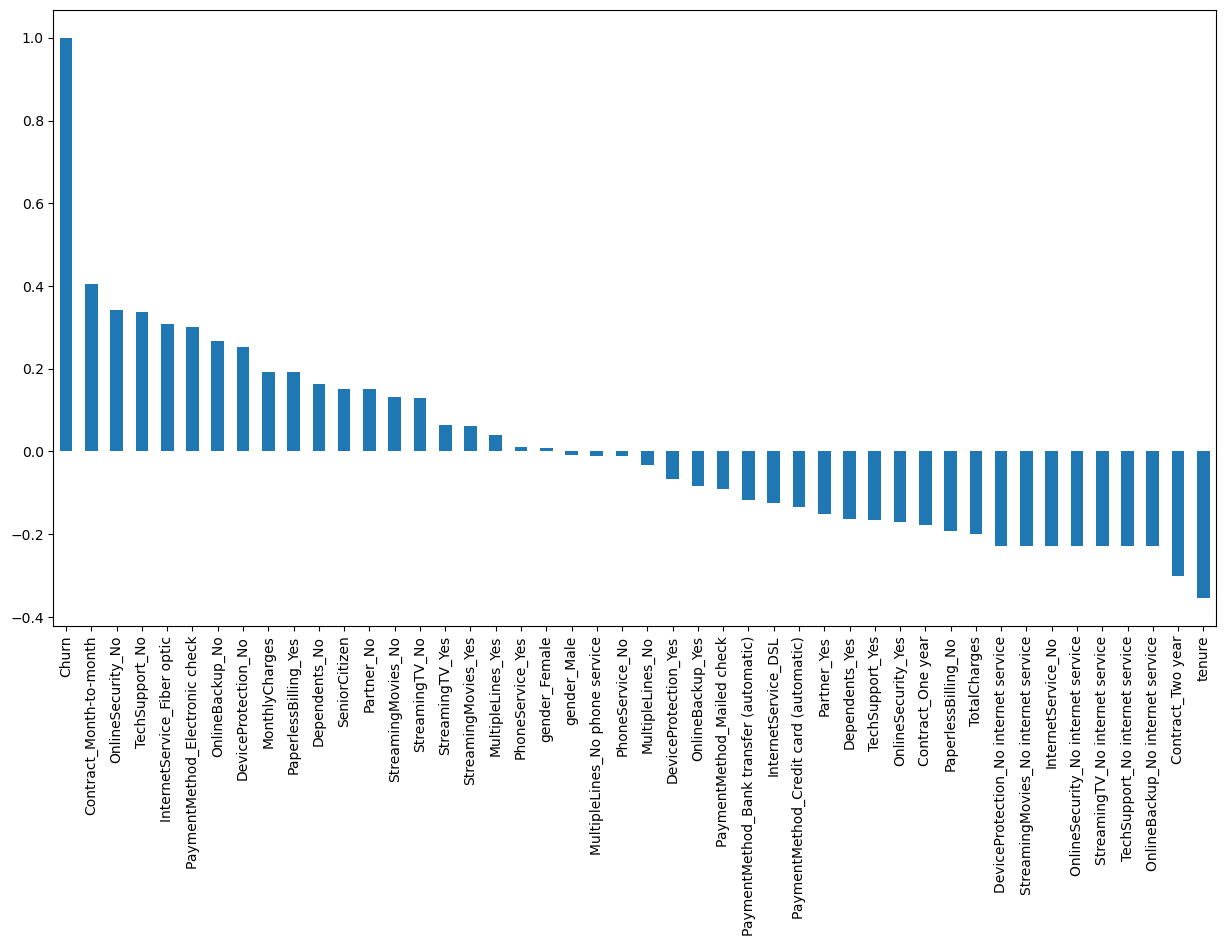

In [25]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [26]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Extra_Services_Count,Extra_Services_Level,No_Extra_Services,1_to_3_Extra_Services,4_or_More_Extra_Services
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,0,1,1 or More,0,1,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,0,2,1 or More,0,1,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,1,2,1 or More,0,1,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,0,3,3 or More,0,1,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,1,0,No Extra Services,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Mailed check,84.80,1990.50,0,5,3 or More,0,0,1
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Credit card (automatic),103.20,7362.90,0,4,3 or More,0,0,1
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Yes,Electronic check,29.60,346.45,0,1,1 or More,0,1,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,Yes,Mailed check,74.40,306.60,1,0,No Extra Services,1,0,0


DECISION TREE

In [27]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [28]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [30]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


Axes(0.125,0.11;0.775x0.77)


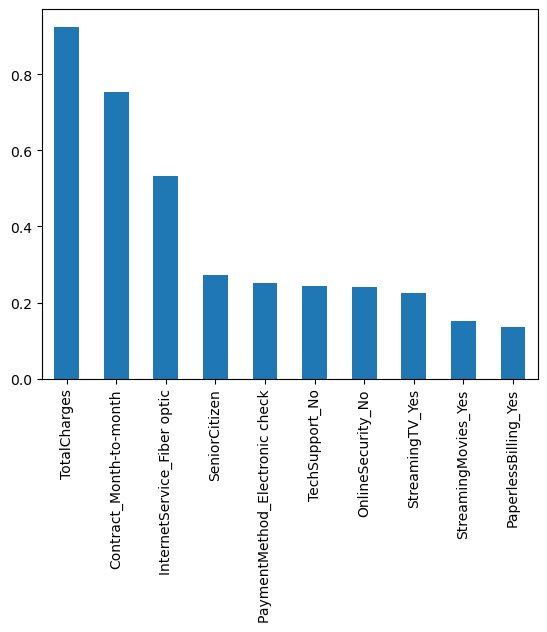

In [31]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


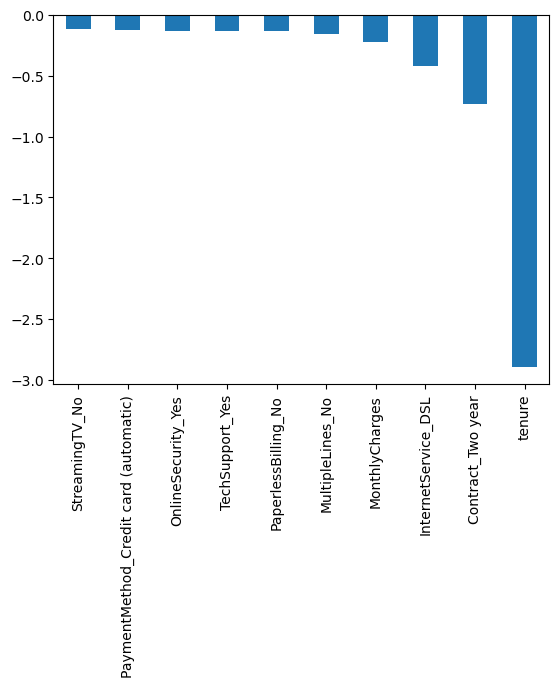

In [32]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

DECISION TREE

In [33]:
#Define Decision tree classifier with some default parameters
clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
max_depth=4, min_samples_leaf=3)
#Fit the training data
clf.fit(X_train, y_train) #what do we need here?

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=100)

In [34]:
y_pred = clf.predict(X_test)
y_pred_probs = clf.predict_proba(X_test)
y_pred_probs

array([[0.52173913, 0.47826087],
       [0.92592593, 0.07407407],
       [0.72774869, 0.27225131],
       ...,
       [0.68852459, 0.31147541],
       [0.98139159, 0.01860841],
       [0.72774869, 0.27225131]])

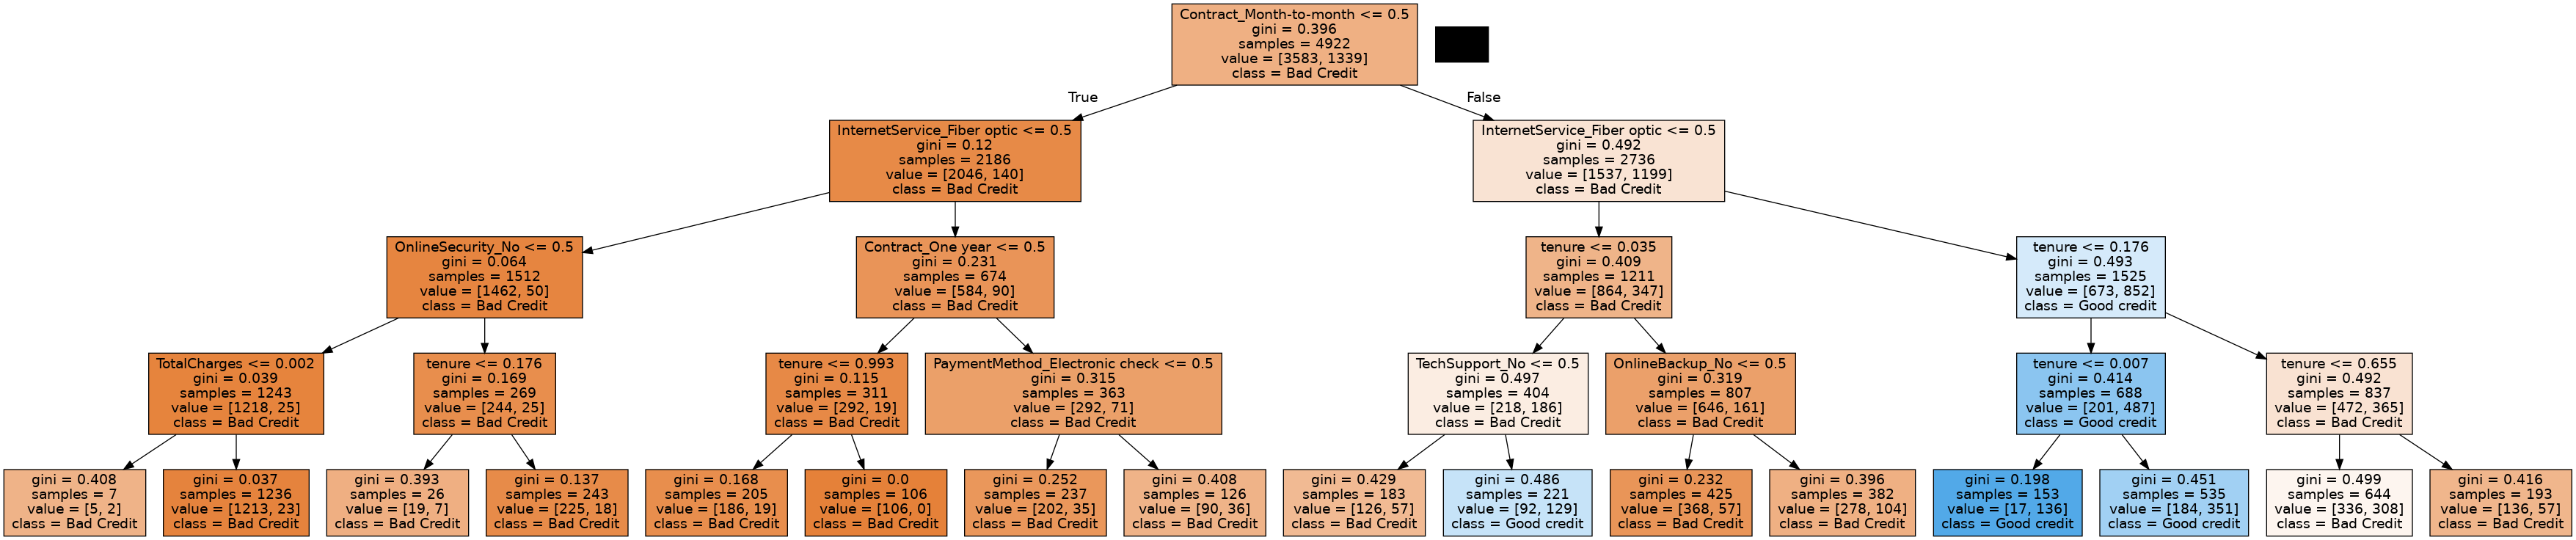

In [35]:
#Decision tree plot
import pydotplus
from IPython.display import Image
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
feature_names=X_train.columns,
class_names=['Bad Credit', 'Good credit'],filled=True) #or use y_train.unique()
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())
# Create PNG
#graph.write_png("clf.png") #uncomment this line to save the plot as a .png file

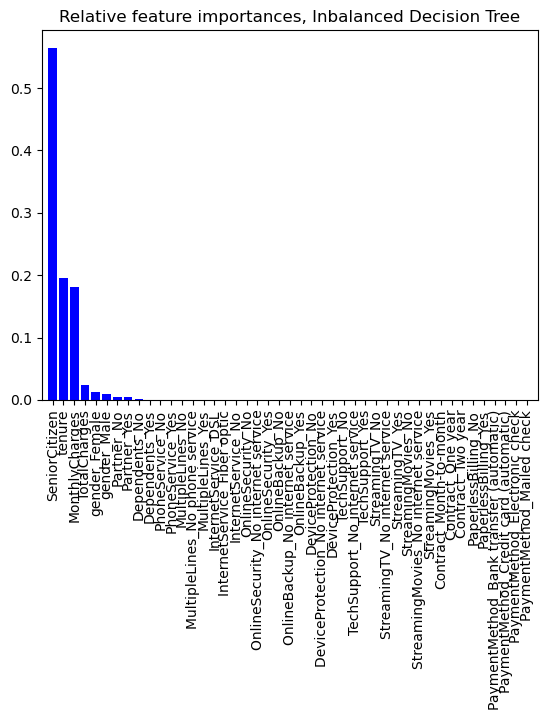

In [36]:
# Print the feature ranking
#print("Feature ranking:")
#for f in range(X.shape[1]):
# print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# Plot the feature importances of the forest
importances = clf.feature_importances_
# Calculate feature importances (assuming you have already calculated 'importances')
indices = np.argsort(importances)[::-1]  # Sort indices in descending order of importance
# Assuming you have defined X with column names
feature_order = X.columns.values

plt.figure()
plt.title("Relative feature importances, Inbalanced Decision Tree")
plt.bar(range(X.shape[1]), importances[indices],
color="b", align="center")
plt.xticks(range(X.shape[1]), feature_order, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [37]:
print ("Accuracy is: ", (accuracy_score(y_test,y_pred)*100).round(2))

Accuracy is:  79.81


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1580
           1       0.65      0.43      0.52       530

    accuracy                           0.80      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.80      0.78      2110



In [39]:
import itertools  # Don't forget to import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Move this part inside the function
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylim([1.5, -0.5]) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# You can call the function and provide the 'cm' variable when using it
# For example:
# plot_confusion_matrix(your_cm_data, your_class_labels, normalize=True, title='Normalized Confusion Matrix')


/tmp/ipykernel_739/402349670.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


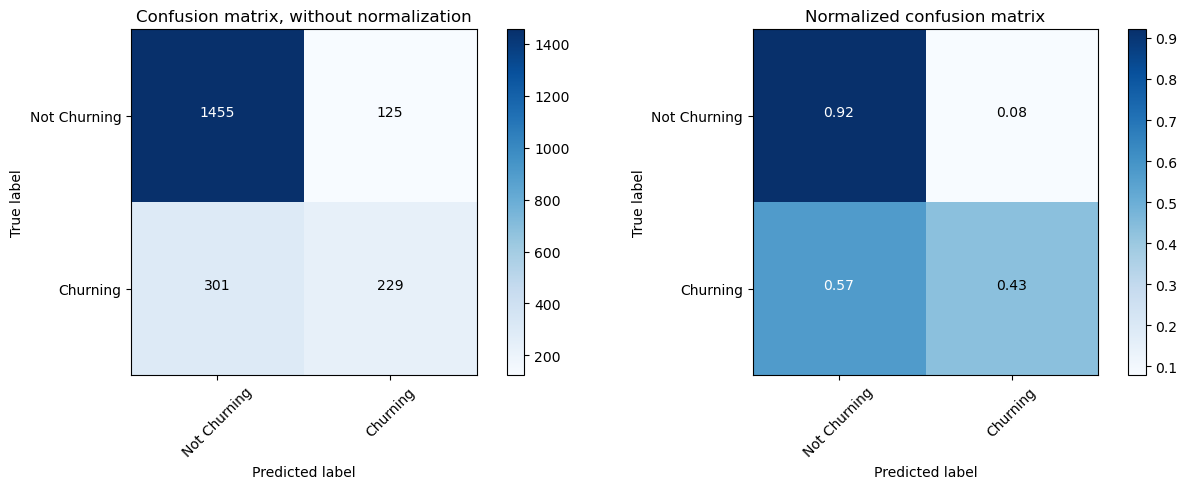

In [40]:
# Compute confusion matrix
class_names = ['Not Churning', 'Churning']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(13, 5))
plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.subplot(122)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
title='Normalized confusion matrix')
plt.show()


In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])
roc_auc = auc(fpr, tpr)
print("AUC score on Testing: " + str(roc_auc))


AUC score on Testing: 0.8131800812037259


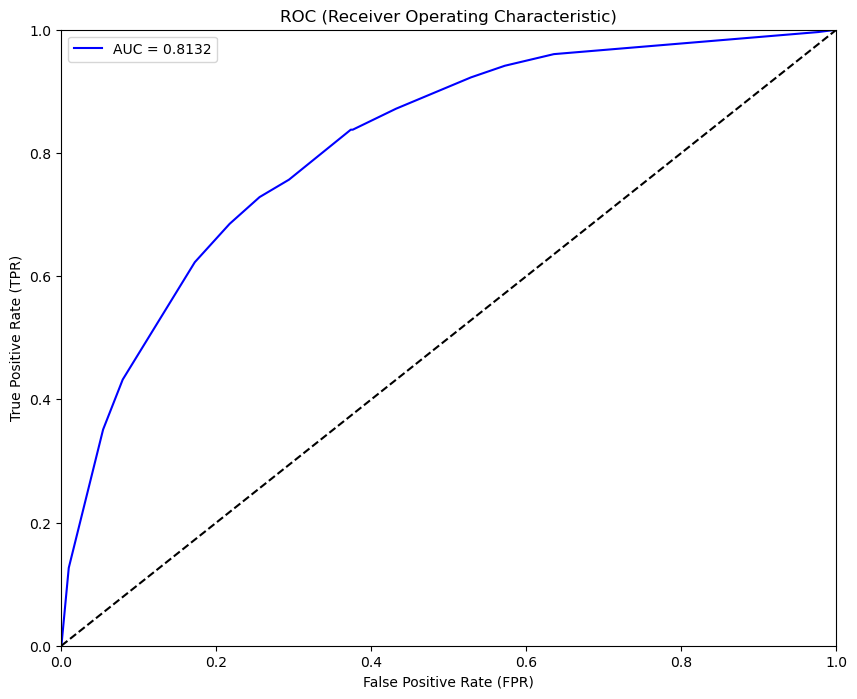

In [42]:
fig, axs = plt.subplots(1,1, figsize=(10,8))
plt.title('ROC (Receiver Operating Characteristic)')
plt.plot(fpr, tpr, 'b', label='AUC = %0.4f'% roc_auc)
plt.legend(loc='best')
plt.plot([0,1],[0,1],color='black', linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)');

SMOTE

In [43]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)


In [44]:
clf_sm = tree.DecisionTreeClassifier(criterion = "gini",
max_depth=4, min_samples_leaf=3)
#Fit the training data
clf_sm.fit(X_sm, y_sm) #what do we need here?
y_pred_2 = clf_sm.predict(X_test)
print ("Accuracy is: ", (accuracy_score(y_test,y_pred_2)*100).round(2))
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_2))


Accuracy is:  71.18
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1580
           1       0.65      0.43      0.52       530

    accuracy                           0.80      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.80      0.78      2110

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1580
           1       0.46      0.75      0.57       530

    accuracy                           0.71      2110
   macro avg       0.67      0.72      0.67      2110
weighted avg       0.78      0.71      0.73      2110



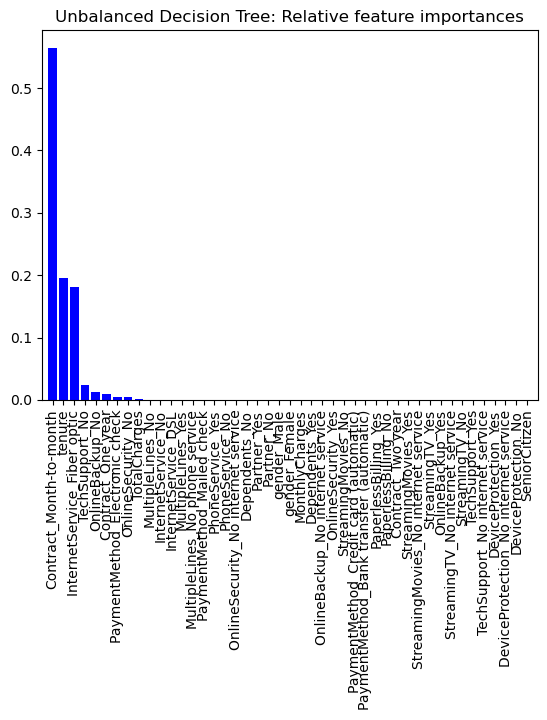

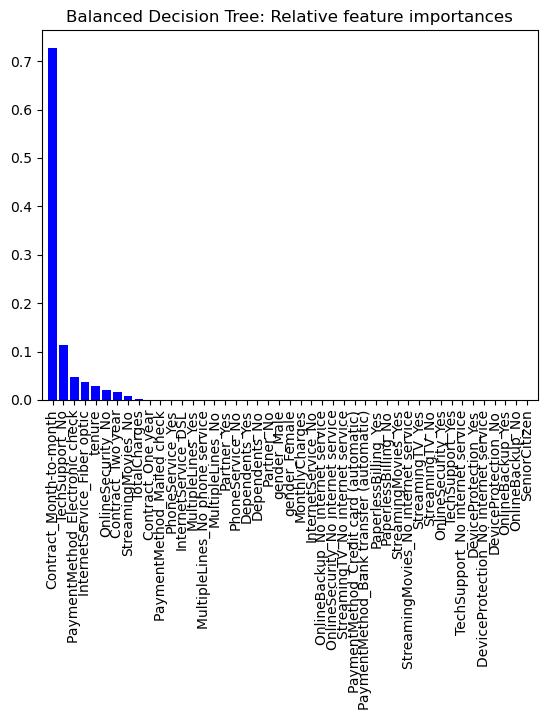

In [45]:
#Unbalanced plot
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]
plt.figure()
plt.title("Unbalanced Decision Tree: Relative feature importances")
plt.bar(range(X.shape[1]), importances[indices],
color="b", align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
#Balanced plot
importances_bal = clf_sm.feature_importances_
indices = np.argsort(importances_bal)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(importances_bal)[::-1]
feature_order = feature_order[:,i]
plt.figure()
plt.title("Balanced Decision Tree: Relative feature importances")
plt.bar(range(X.shape[1]), importances_bal[indices],
color="b", align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    7032 non-null   object  
 1   SeniorCitizen             7032 non-null   int64   
 2   Partner                   7032 non-null   object  
 3   Dependents                7032 non-null   object  
 4   tenure                    7032 non-null   int64   
 5   PhoneService              7032 non-null   object  
 6   MultipleLines             7032 non-null   object  
 7   InternetService           7032 non-null   object  
 8   OnlineSecurity            7032 non-null   object  
 9   OnlineBackup              7032 non-null   object  
 10  DeviceProtection          7032 non-null   object  
 11  TechSupport               7032 non-null   object  
 12  StreamingTV               7032 non-null   object  
 13  StreamingMovies           7032 non-null   object  
 1

In [48]:
log_regression_imb = LogisticRegression(max_iter=10000,random_state=100). fit(X_train, y_train)

In [49]:
y_pred_log_imb = log_regression_imb.predict(X_test)
y_predProbs_log_imb = log_regression_imb.predict_proba(X_test)
acc_imb = (accuracy_score(y_test, y_pred_log_imb)*100).round(4)
print('Accuracy of the imbalanced logistic regression: = ' +str(acc_imb)+'%')

Accuracy of the imbalanced logistic regression: = 80.7583%


In [50]:
 classification_report_imb = classification_report(y_test, y_pred_log_imb)
print(classification_report_imb)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [51]:
mse_log_imb = mean_squared_error(y_test, y_pred_log_imb)
rmse_log_imb = math.sqrt(mse_log_imb)
print(rmse_log_imb)

0.43865369212098787


In [52]:
 importance_log_imb = log_regression_imb.coef_[0]
indices_log_reg_imb = np.argsort(importance_log_imb)[::-1]
feature_order_log_imb = np.array([X.columns.values])
i = np.argsort(importance_log_imb)[::-1]
feature_order_log_imb = feature_order_log_imb[:,i]

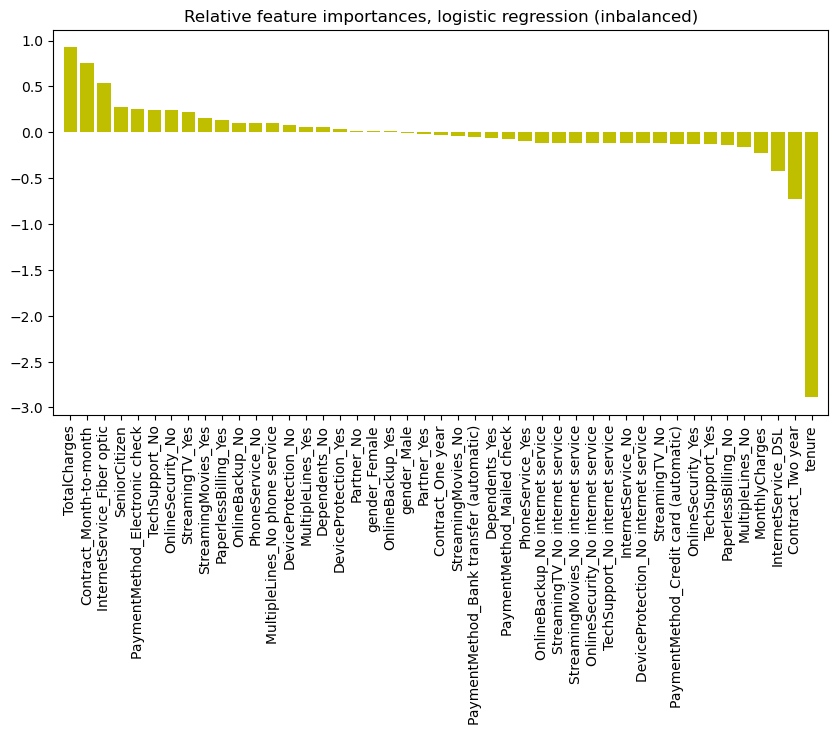

In [54]:
plt.figure(figsize=(10,5))
plt.title("Relative feature importances, logistic regression (inbalanced)")
plt.bar(range(X.shape[1]), importance_log_imb[indices_log_reg_imb],
       color='y',  align="center")
plt.xticks(range(X.shape[1]), feature_order_log_imb[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [55]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [56]:
log_regression_bal = LogisticRegression(max_iter=10000).fit(X_sm, y_sm)

In [57]:
 y_pred_log_bal = log_regression_bal.predict(X_test)
y_predProbs_log_bal = log_regression_bal.predict_proba(X_test)
acc_bal = (accuracy_score(y_test, y_pred_log_bal)*100).round(4)

In [58]:
print('Accuracy of the balanced logistic regression: ' + str(acc_bal)+ '%')

Accuracy of the balanced logistic regression: 75.3555%


In [63]:
classification_report_bal = classification_report(y_test, y_pred_log_bal)
print(classification_report_bal)

from itertools import product

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5])  # added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1580
           1       0.51      0.76      0.61       530

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.75      0.77      2110



In [64]:
mse_log_bal = mean_squared_error(y_test, y_pred_log_bal)
rmse_log_bal = math.sqrt(mse_log_bal)
print(rmse_log_bal)

0.49643277251842644


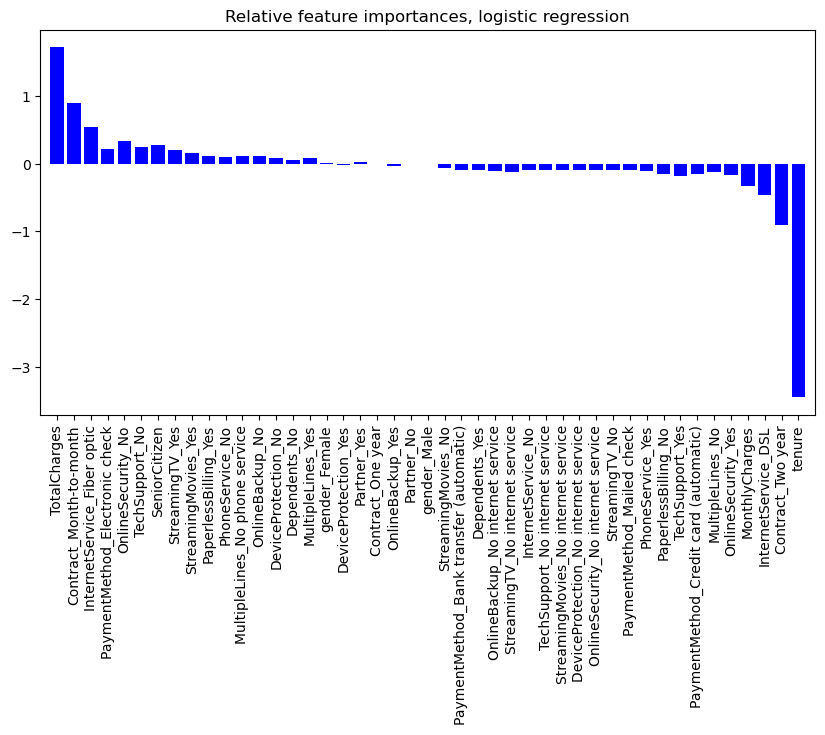

In [65]:
 importance_log_bal = log_regression_bal.coef_[0]
indices_log_reg_bal = np.argsort(importance_log_imb)[::-1]
feature_order_log_bal = np.array([X.columns.values])
i = np.argsort(importance_log_bal)[::-1]
feature_order_log_bal = feature_order_log_bal[:,i]
#Plot the feature importances of Logistic regression model, imbalanced
plt.figure(figsize=(10,5))
plt.title("Relative feature importances, logistic regression")
plt.bar(range(X.shape[1]), importance_log_bal[indices_log_reg_bal],
       color='b',  align="center")
plt.xticks(range(X.shape[1]), feature_order_log_bal[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [68]:
from itertools import product

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5])  # added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


/tmp/ipykernel_739/972949464.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


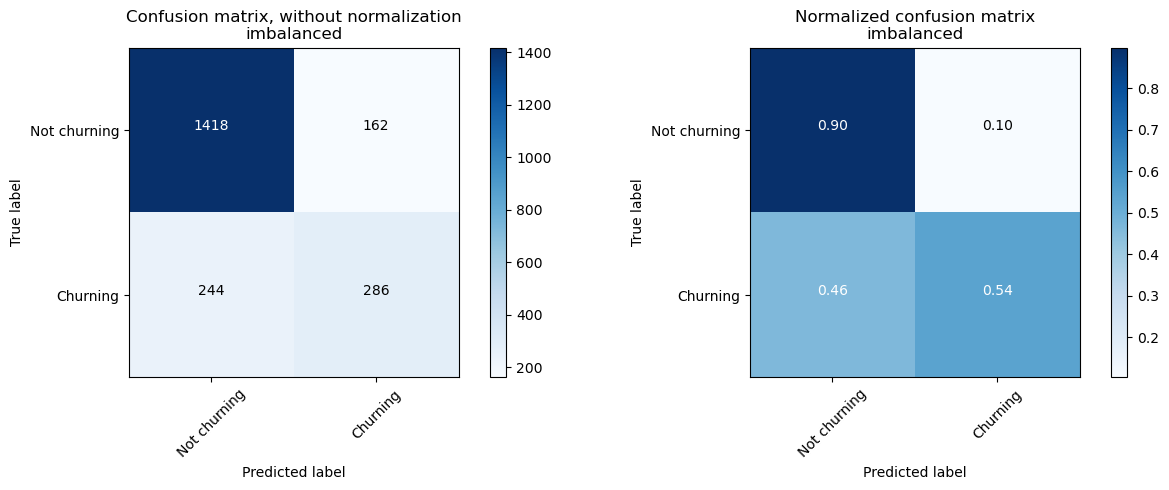

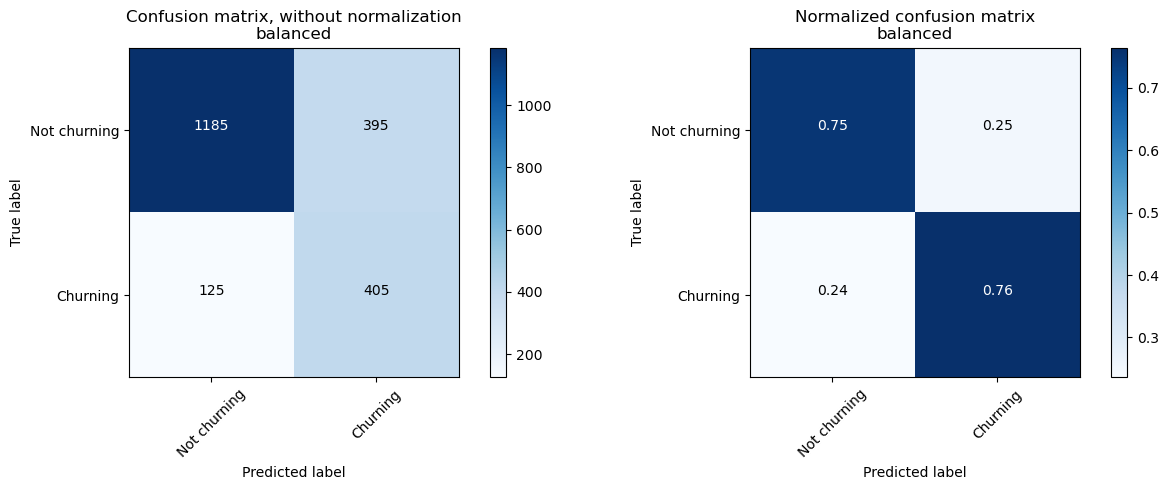

In [72]:
class_names = ['Not churning', 'Churning']
cnf_matrix_imb = confusion_matrix(y_test, y_pred_log_imb)
cnf_matrix_bal = confusion_matrix(y_test, y_pred_log_bal)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(13, 5))
plt.subplot(121)
plot_confusion_matrix(cnf_matrix_imb, classes=class_names, title='Confusion matrix, without normalization\nimbalanced')
# Plot normalized confusion matrix
plt.subplot(122)
plot_confusion_matrix(cnf_matrix_imb, classes=class_names, normalize=True, title='Normalized confusion matrix\nimbalanced')
plt.figure(figsize=(13, 5))
plt.subplot(121)
plot_confusion_matrix(cnf_matrix_bal, classes=class_names, title='Confusion matrix, without normalization\nbalanced')
# Plot normalized confusion matrix
plt.subplot(122)
plot_confusion_matrix(cnf_matrix_bal, classes=class_names, normalize=True, title='Normalized confusion matrix\nbalanced')
                      
plt.show()